In [91]:
import pandas as pd
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import datetime 

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, explained_variance_score


from bqplot import pyplot as plt

def create_bqplot(y_test, y_pred , title):
    
    fig = plt.figure(title=title )

    options = {'x':{'label':"Date"}, 'y':{'label':'Close Price'}}

    scat = plt.plot(y_test.index, y_test.values* std_y + mean_y,
                       colors=["blue"],
                       axes_options = options,
                       stroke="black", stroke_width=2.0,
                       default_size=150,
                       default_opacities=[0.7],
                        labels=['Actual Price'], legend_location= {"bottom"},display_legend=True ,
                    marker_str= "g-o"
                       )
    

    scat = plt.plot(y_test.index, y_pred* std_y + mean_y,
                       colors=["green"],
                       axes_options = options,
                       stroke="black", stroke_width=2.0,
                       default_size=150,
                       default_opacities=[0.7],
                       labels=['Predicted Price'],legend_location= {"bottom"}, display_legend=True
                       )

    fig.legend_style = {
        'fill': ''  ,
        'stroke' : '0' ,
        'stroke-width':3,
        'opacity':0.7   , 
        'stroke-width': 0
                      }
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    
    plt.show()
    return fig 
    

def create_X_data(lag, Dates):
    rows_list = []
    
    for i in range(len(Dates)):
        x_date = Dates[i]-  datetime.timedelta(days=lag)
        new_df = boyd.loc[x_date : x_date+ datetime.timedelta(days=lag-1)] 

        c_window = new_df[casino_features][0 :lag]
        t_window = new_df[tech_features][0 :lag].dropna()

        ans = []
        for col in casino_features:
            ans.append(np.array(c_window[col]).squeeze())

        c_ans = np.concatenate(ans)

        ans = []
        for col in tech_features:
            ans.append(np.array(t_window[col]).squeeze())

        t_ans = np.concatenate(ans)
        
        vector = np.concatenate((c_ans, t_ans), axis=None)
        vector = vector.astype('float')
        
        assert not np.isnan(np.sum(vector))
        
        rows_list.append(list(vector))
        
        
    X_df = pd.DataFrame(rows_list, index = Dates)
    
    return X_df, rows_list



# Reading stock and footfall data


In [80]:
#Get the data of the stock
start_date = '2018-03-05'
end_date = '2020-08-16'

boyd = yf.download('BYD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)

from ta import add_all_ta_features

a = add_all_ta_features(boyd, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
boyd = boyd[["trend_macd", 'momentum_rsi',"Volume" , "Adj Close"]]

footfall = pd.read_csv("casino.csv", names = ['Date', 'Casino1','Casino2','Casino3','Casino4','Casino5','Casino6','Casino7','Casino8','Casino9']) 
footfall = footfall.iloc[5:]

Date = footfall["Date"]
footfall = footfall.drop(["Date"], axis=1)
footfall.index = pd.date_range('20180305', '20200816')
footfall = footfall.astype('int')
footfall["total_foot"] = footfall.sum(axis = 1)
footfall = footfall.drop(['Casino1','Casino2','Casino3','Casino4','Casino5','Casino6','Casino7','Casino8','Casino9'], axis=1)

boyd = boyd.merge(footfall, left_index=True, right_index=True, how='right')

casino_features = ["total_foot"]
tech_features = ["trend_macd", 'momentum_rsi',"Volume"]

boyd.head(2)

/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,trend_macd,momentum_rsi,Volume,Adj Close,total_foot
2018-03-05,0.000000,100.0,1003700.0,34.671322,3619
2018-03-06,0.028718,100.0,1166400.0,35.025013,4385


In [81]:
boyd[boyd.index >'2018-03-27'].head(30)

,trend_macd,momentum_rsi,Volume,Adj Close,total_foot
2018-03-28,-0.938731,27.522854,1087100.0,30.826263,4448
2018-03-29,-0.934802,34.235127,3020100.0,31.347742,4361
2018-03-30,NaN,NaN,NaN,NaN,5102
2018-03-31,NaN,NaN,NaN,NaN,5335
2018-04-01,NaN,NaN,NaN,NaN,4768
2018-04-02,-1.008820,28.363825,1128500.0,30.265427,4157
2018-04-03,-1.004260,35.314700,1363500.0,30.895136,4181
2018-04-04,-0.938987,41.347749,1049200.0,31.515009,4340
2018-04-05,-0.790195,50.031355,2850300.0,32.587486,4361
2018-04-06,-0.753959,42.988574,1085400.0,31.485491,5165


# Doing holidays adjustment


In [82]:

y = boyd["Adj Close"][7:]
Dates = boyd.index[7:]
n_weeks = 0 
for i in range(0,len(Dates),7):
    week = 7 
    x_date = Dates[i] -  datetime.timedelta(days=week)
    new_df = boyd.loc[x_date : x_date + datetime.timedelta(days=week-3)]
    new_df = new_df.fillna(method='ffill')
    new_df = new_df.fillna(method='bfill')
    if sum(new_df.isna().sum()) != 0:
        print("Nan value not getting filled")
        print(i)
    boyd.update(new_df)
    n_weeks = n_weeks + 1 

In [83]:
boyd.shape

(896, 5)

# Creating the input feature vectors 

In [84]:
Dates = boyd.index[7:]
lag = 7
X_df , rows_list =create_X_data(lag,Dates)
# assert not np.sum(X_df.isna().sum())
# assert (n_weeks*2 == y.isna().sum())

In [85]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
2018-03-12,3619.0,4385.0,4354.0,4749.0,5778.0,5602.0,5070.0,0.000000,0.028718,0.062856,...,100.000000,100.000000,100.000000,83.323807,51.479538,1003700.0,1166400.0,1097800.0,749100.0,1789200.0
2018-03-13,4385.0,4354.0,4749.0,5778.0,5602.0,5070.0,4283.0,0.028718,0.062856,0.081707,...,100.000000,100.000000,83.323807,51.479538,22.116384,1166400.0,1097800.0,749100.0,1789200.0,2354100.0
2018-03-14,4354.0,4749.0,5778.0,5602.0,5070.0,4283.0,4286.0,0.062856,0.081707,0.070816,...,100.000000,83.323807,51.479538,22.116384,13.495214,1097800.0,749100.0,1789200.0,2354100.0,2500100.0
2018-03-15,4749.0,5778.0,5602.0,5070.0,4283.0,4286.0,4563.0,0.081707,0.070816,-0.018297,...,83.323807,51.479538,22.116384,13.495214,28.022092,749100.0,1789200.0,2354100.0,2500100.0,1757100.0
2018-03-16,5778.0,5602.0,5070.0,4283.0,4286.0,4563.0,5271.0,0.070816,-0.018297,-0.170868,...,51.479538,22.116384,13.495214,28.022092,22.042528,1789200.0,2354100.0,2500100.0,1757100.0,1278000.0


In [86]:
merged_df =X_df.merge(y, left_index=True, right_index=True, how='inner')

merged_df = merged_df.dropna()


X = merged_df[X_df.columns.values]
y = merged_df['Adj Close']

# Run a linear regression model to predict the stock price 


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge 


In [98]:
X_new = X 
y_new = y 

split = 0.95
X_train = X_new[:int(len(X_new)*split)]
X_test = X_new[int(len(X_new)*split):]
y_train = y_new[:int(len(X_new)*split)]
y_test = y_new[int(len(X_new)*split):]


#Standardizing the data 
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

mean_y = np.mean(y_train)
std_y = np.std(y_train)
y_train = (y_train - mean_y)/std_y
y_test = (y_test - mean_y)/std_y


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred), model.score(X_test,y_test), r2_score(y_test, y_pred), explained_variance_score(y_test, y_pred)



(0.12462268288456614, 0.491836752354081, 0.491836752354081, 0.6181320217611936)

In [94]:
y_pred = model.predict(X_train)


In [95]:
mean_squared_error(y_train, y_pred), model.score(X_train,y_train)

(0.44736339875628833,
 0.5526366012437114,
 0.5526366012437114,
 0.5526366012437114)

In [68]:
from bqplot import pyplot as plt
title = "Linear Regression-Overfitting Train Data "
fig = create_bqplot(y_train, y_pred, title)

In [69]:
fig.save_png(title + ".png")

In [16]:
# from yellowbrick.regressor import PredictionError, ResidualsPlot
# viz = ResidualsPlot(model)
# viz.fit(X_train,y_train)
# viz.score(X_test,y_test)

Number of Trades: 32
Time Frame: 42 days
Profit: $20.95 | 0.42%


/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


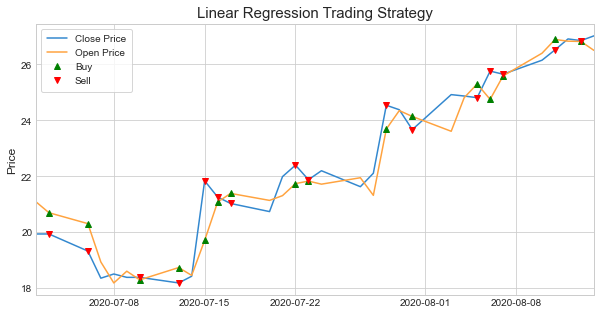

Sharpe Ratio is : 1.1901137444022387


In [15]:
from matplotlib import pyplot as plt
#Trading Strategy 

boyd = yf.download('BYD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pred_dates = y_test.index
open_price = boyd.loc[pred_dates[0]:]["Open"]
y_predicted = y_pred* std_y + mean_y

stock = pd.DataFrame(open_price, index = pred_dates)
stock['Predicted_Close'] = y_predicted
stock['Close'] = y_test * std_y + mean_y
stock["Date"] = stock.index
stock.loc[stock.index[0],'Predicted_Close'] = stock.loc[stock.index[0],'Open'] - 1 

stock['returns_pred']  = stock.Predicted_Close.pct_change()
stock['signal'] = np.where(stock['returns_pred']>0 , 1, 0)
stock['Best_signal'] = np.where(stock['Close']>stock['Open'] , 1, 0)
stock = stock.interpolate()
profit , net = long_only_trading(stock,'signal' ,"Linear Regression Trading Strategy",5000, True, True  )

#Finding sharpe Ratio 
stock['returns_pred']  = stock.Predicted_Close.pct_change()
stock['excess_daily_ret'] = stock['returns_pred'] - 0.05/252
sharpe = np.sqrt(30) * stock['excess_daily_ret'].mean() / stock['excess_daily_ret'].std()
print("Sharpe Ratio is : "+ str(sharpe) )



# Lasso Regression model 

In [71]:
thr = [i for i in np.arange(0.0001,1 , 0.05)]
for k in thr: 
    model = Lasso(k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mean_squared_error(y_test, y_pred), model.score(X_test,y_test)

/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.47637245776649, tolerance: 0.06029999999999997
  positive)


In [72]:
model = Lasso(0.0028)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred), model.score(X_test,y_test)

(0.11007685070148696, 0.5511490472812628)

In [74]:
y_pred = model.predict(X_train)

mean_squared_error(y_train, y_pred), model.score(X_train,y_train)

(0.4607313079046173, 0.5392686920953824)

In [76]:
from bqplot import pyplot as plt
title = "Lasso Model Price Prediction with alpha = 0.0028 "
fig = create_bqplot(y_train, y_pred, title)

In [78]:
np.array[1]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [19]:
fig.save_png(title + ".png")

Number of Trades: 36
Time Frame: 42 days
Profit: $450.55 | 9.01%


/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


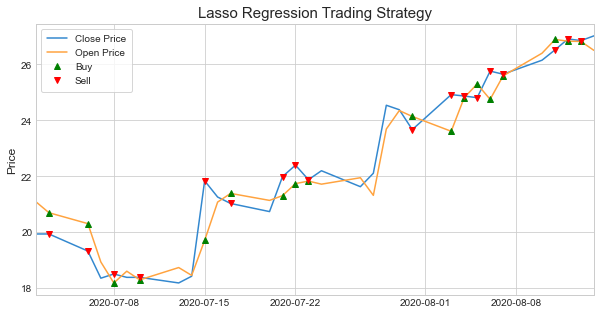

Sharpe Ratio is : 1.3635258592497241


In [21]:
from matplotlib import pyplot as plt
#Trading Strategy 
boyd = yf.download('BYD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pred_dates = y_test.index
open_price = boyd.loc[pred_dates[0]:]["Open"]
y_predicted = y_pred* std_y + mean_y

stock = pd.DataFrame(open_price, index = pred_dates)
stock['Predicted_Close'] = y_predicted
stock['Close'] = y_test * std_y + mean_y
stock["Date"] = stock.index
stock.loc[stock.index[0],'Predicted_Close'] = stock.loc[stock.index[0],'Open'] - 1 

stock['returns_pred']  = stock.Predicted_Close.pct_change()
stock['signal'] = np.where(stock['returns_pred']>0 , 1, 0)
stock['Best_signal'] = np.where(stock['Close']>stock['Open'] , 1, 0)
stock = stock.interpolate()
profit , net = long_only_trading(stock,'signal' ,"Lasso Regression Trading Strategy",5000, True, True  )

#Finding sharpe Ratio 
stock['returns_pred']  = stock.Predicted_Close.pct_change()
stock['excess_daily_ret'] = stock['returns_pred'] - 0.05/252
sharpe = np.sqrt(30) * stock['excess_daily_ret'].mean() / stock['excess_daily_ret'].std()
print("Sharpe Ratio is : "+ str(sharpe) )




# Ridge Regression 


In [19]:
thr = [i for i in np.arange(0.0001,5 , 0.05)]
for k in thr: 
    model = Ridge(k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(k, mean_squared_error(y_test, y_pred), model.score(X_test,y_test))

0.0001 0.12461958931150305 0.49184936675218405
0.050100000000000006 0.12321102938196205 0.4975929310193926
0.10010000000000001 0.12200113786169274 0.502526402117979
0.1501 0.12093559618251416 0.5068712702243334
0.2001 0.11998670328967569 0.5107404895585022
0.2501 0.11913564318572359 0.5142107845028564
0.30010000000000003 0.11836815087806452 0.5173403221967652
0.3501 0.1176728624365995 0.5201754403653638
0.4001 0.11704048178885301 0.5227540448077423
0.4501 0.11646327762753902 0.5251076608139051
0.5001 0.11593474459003365 0.5272628147442346
0.5501 0.11544935935722558 0.5292420285643351
0.6001000000000001 0.11500239756160781 0.5310645664232347
0.6501 0.11458979246580644 0.5327470109078547
0.7001000000000001 0.11420802372237318 0.5343037166376812
0.7501 0.11385402851967832 0.5357471725775531
0.8001 0.11352512978556858 0.5370882947954614
0.8501000000000001 0.11321897762150593 0.5383366652715489
0.9001 0.11293350114201109 0.5395007282782889
0.9501000000000001 0.1126668685903852 0.54058795301

In [21]:
model = Ridge(1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred), model.score(X_test,y_test)

(0.11241793673481162, 0.5416030011347945)

## NeuralNetworks

In [34]:
X_new = X
y_new = y


split = 0.96
X_train = X_new[:int(len(X_new)*split)]
X_test = X_new[int(len(X_new)*split):]
y_train = y_new[:int(len(X_new)*split)]
y_test = y_new[int(len(X_new)*split):]

#Standardizing the data 
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

mean_y = np.mean(y_train)
std_y = np.std(y_train)
y_train = (y_train - mean_y)/std_y
y_test = (y_test - mean_y)/std_y

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split

regr = MLPRegressor(random_state=1, 
                    max_iter=500, 
                    alpha=1, 
                    activation = 'relu',
                    hidden_layer_sizes = (100, 20, 10),
                    solver = 'sgd',
                    learning_rate = 'adaptive'
                   )

regr = regr.fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
y_pred = regr.predict(X_test)

print(regr.score(X_train, y_train), regr.score(X_test, y_test))
MSE_error = mean_squared_error(y_train, y_pred_train)
print('Train data Mean Squared Error is {}'.format(MSE_error))

MSE_error = mean_squared_error(y_test, y_pred)
print('Test data Mean Squared Error is {}'.format(MSE_error))

MSE_error = mean_absolute_error(y_train, y_pred_train)
print('Train data Mean Alsolute Error is {}'.format(MSE_error))

MSE_error = mean_absolute_error(y_test, y_pred)
print('Test data Mean Alsolute Error is {}'.format(MSE_error))


0.6363680163732535 0.8019086128147763
Train data Mean Squared Error is 0.36363198362674676
Test data Mean Squared Error is 0.039968910137805964
Train data Mean Alsolute Error is 0.50736923777444
Test data Mean Alsolute Error is 0.16954718846488356


/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [44]:
MLPRegressor(random_state=1, max_iter=500, alpha=1)
0.670577801048615 0.7402082686703921
Train data Mean Squared Error is 0.3294221989513853
Test data Mean Squared Error is 0.052418191985040906


regr = MLPRegressor(random_state=1, max_iter=500, alpha=1, hidden_layer_sizes = (100, 50, 25))
0.6308610962084 0.7573398825391179
Train data Mean Squared Error is 0.3691389037916002
Test data Mean Squared Error is 0.0489615453081491

regr = MLPRegressor(random_state=1, max_iter=500, alpha=1, hidden_layer_sizes = (100, 50, 100)).fit(X_train, y_train)
0.6472984364401968 0.7797198576482328
Train data Mean Squared Error is 0.3527015635598035
Test data Mean Squared Error is 0.044445936493788335

regr = MLPRegressor(random_state=9, max_iter=500, alpha=1, hidden_layer_sizes = (100, 50, 100)).fit(X_train, y_train)
0.6396932673546982 0.7597106783680551
Train data Mean Squared Error is 0.36030673264530205
Test data Mean Squared Error is 0.048483189702747266
MLPRegressor(random_state=1, max_iter=500, alpha=1)

regr = MLPRegressor(random_state=100, max_iter=500, alpha=1, hidden_layer_sizes = (100, 50, 100)).fit(X_train, y_train)
0.6432292510305666 0.742223274215742
Train data Mean Squared Error is 0.3567707489694337
Test data Mean Squared Error is 0.052011624204817496


regr = MLPRegressor(random_state=1, 
                    max_iter=500, 
                    alpha=1, 
                    hidden_layer_sizes = (100, 20, 10),
                    solver = 'sgd',
                    learning_rate = 'adaptive'
                   )
0.6363680163732535 0.8019086128147763
Train data Mean Squared Error is 0.36363198362674676
Test data Mean Squared Error is 0.039968910137805964
Train data Mean Alsolute Error is 0.50736923777444
Test data Mean Alsolute Error is 0.16954718846488356

random_state = 2 
0.6402314541133234 0.7576016370308111
Train data Mean Squared Error is 0.35976854588667684
Test data Mean Squared Error is 0.048908731089897045
Train data Mean Alsolute Error is 0.5081986103341545
Test data Mean Alsolute Error is 0.1769554139864444

random_state = 5 
0.642772412166635 0.7283084189846871
Train data Mean Squared Error is 0.35722758783336517
Test data Mean Squared Error is 0.05481922531364601
Train data Mean Alsolute Error is 0.507600245183888
Test data Mean Alsolute Error is 0.18514739089851748

random_state = 10
0.6277085381077268 0.7608840852518693
Train data Mean Squared Error is 0.3722914618922735
Test data Mean Squared Error is 0.04824643133096403
Train data Mean Alsolute Error is 0.5185469179442196
Test data Mean Alsolute Error is 0.18321462910130154

## Using Time Series Split in Grid Search CV 

In [23]:
mlp_gs = MLPRegressor(max_iter=500)
parameter_space = {
    'hidden_layer_sizes': [(100, 50, 250),(100,20,10),(100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05,1],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=tscv)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding label

/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=500, momentum=0.9,
                                    n_iter_no_change=10,
                                    nes...
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                      

In [24]:
clf.fit(X_train, y_train) # X is train samples and y is the corresponding label

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=500, momentum=0.9,
                                    n_iter_no_change=10,
                                    nes...
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                      

In [25]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100, 20, 10), 'learning_rate': 'constant', 'solver': 'sgd'}


In [65]:
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [50]:
y_true, y_pred = y_test , clf.predict(X_test)
from sklearn.metrics import regression
print('Results on the test set:')
print(regression(y_true, y_pred))

Results on the test set:


/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



TypeError: 'module' object is not callable

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y_true, y_pred)

0.6785662003148899

In [80]:
from bqplot import pyplot as plt
title = "Neural Networks model Price Prediction"
fig = create_bqplot(y_test, y_pred, title)

In [81]:
fig.save_png(title + ".png")

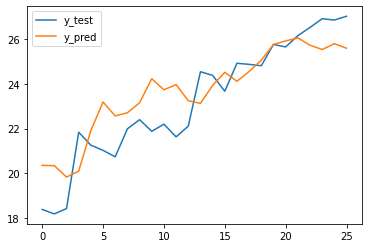

In [20]:
#plt.plot(y_train)
plt.plot(y_test.values* std_y + mean_y, label = "y_test")
plt.plot(y_pred* std_y + mean_y, label = "y_pred")
plt.legend()

## Long only Trading strategy - If signal is positive then buy at open and sell at close 

Number of Trades: 26
Time Frame: 34 days
Profit: $450.55 | 9.01%


/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



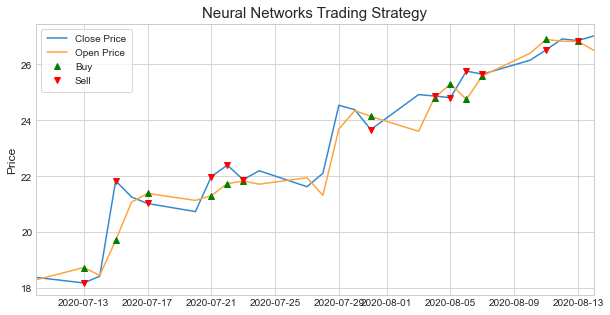

Sharpe Ratio is : 1.9855042847844926


In [85]:
from matplotlib import pyplot as plt

boyd = yf.download('BYD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pred_dates = y_test.index
open_price = boyd.loc[pred_dates[0]:]["Open"]
y_predicted = y_pred* std_y + mean_y

stock = pd.DataFrame(open_price, index = pred_dates)
stock['Predicted_Close'] = y_predicted
stock['Close'] = y_test * std_y + mean_y
stock["Date"] = stock.index
stock.loc[stock.index[0],'Predicted_Close'] = stock.loc[stock.index[0],'Open'] - 1 

stock['returns_pred']  = stock.Predicted_Close.pct_change()
stock['signal'] = np.where(stock['returns_pred']>0 , 1, 0)
stock['Best_signal'] = np.where(stock['Close']>stock['Open'] , 1, 0)

profit , net = long_only_trading(stock,'signal' ,"Neural Networks Trading Strategy",5000, True, True  )
#profit , net = long_only_trading(stock,'Best_signal' ,"Best possible Trading Strategy",5000, True, True )

#Finding sharpe Ratio 
stock['returns_pred']  = stock.Predicted_Close.pct_change()
stock['excess_daily_ret'] = stock['returns_pred'] - 0.05/252
sharpe = np.sqrt(30) * stock['excess_daily_ret'].mean() / stock['excess_daily_ret'].std()
print("Sharpe Ratio is : "+ str(sharpe) )



In [84]:
def long_only_trading(stock,signal,title,budget=15000, show_graph=True, show_return=True):
    
    state_check = lambda x, y: 1 if x > y else 0
    stock = stock.reset_index()    
    money = budget
    prev_state = state_check(stock.loc[0].Predicted_Close, stock.loc[0].Open)
    stock_amt = 0
    net = []
    
    for i in range(1, len(stock)):

        today = stock.iloc[i]
        if today[signal] == 1 : 
            #Buy at open price
            stock_amt = int(money / today.Open)
            money = 0
            net.append([today.Date, today.Open, 1, stock_amt * today.Close])
            
            
            #Sell at close price
            money = stock_amt * today.Close
            stock_amt = 0
            net.append([today.Date, today.Close, 0, money])
    
    profit = net[-1][3] - budget
    
    if show_return == True:
        print('Number of Trades: {}'.format(len(net)))
        print('Time Frame: {} days'.format((net[-1][0] - stock.loc[0].Date).days))
        print('Profit: ${:.2f} | {}%'.format(profit, round(profit/budget*100, 2)))

    if show_graph == True:
        trading_history(stock.set_index('Date'), net,title )

    return profit, net    
    
    
    
def trading_history(stock, net,title, std=2):    
    
    # Bollinger band plot with EMA and original historical data
    plt.figure(figsize=(10,5))
    plt.style.use('seaborn-whitegrid')
    plt.plot(stock.index, stock.Close, color='#3388cf', label='Close Price')
    plt.plot(stock.index, stock.Open, color='#ffa33f', label='Open Price')
  
    plt.title(title, fontSize=15)
    plt.ylabel('Price', fontSize=12)
    plt.xlim([stock.index[0], stock.index[-1]])
    
    for i in net:
        if i[2] == 1: 
            color = 'green'
            marker = '^'
        else: 
            color = 'red'
            marker = "v"
        plt.plot_date(i[0], i[1], color=color, marker = marker )
        
    plt.plot_date([],[],label='Buy', c='green', marker = '^')
    plt.plot_date([],[],label='Sell', c='red', marker = "v")
        
    plt.legend(frameon=True, loc=0, ncol=1, fontsize=10, borderpad=.6)
    plt.savefig(title + ".png")
    plt.show()

$$
p_{i}=\sum_{j}\left(\text { weight }_{i j} * \operatorname{resp}_{i j} * \text { action }_{i j}\right)
$$


# Decision Tree 

In [102]:
from sklearn.tree import DecisionTreeRegressor

X_new = X
y_new = y


split = 0.96
X_train = X_new[:int(len(X_new)*split)]
X_test = X_new[int(len(X_new)*split):]
y_train = y_new[:int(len(X_new)*split)]
y_test = y_new[int(len(X_new)*split):]

#Standardizing the data 
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

mean_y = np.mean(y_train)
std_y = np.std(y_train)
y_train = (y_train - mean_y)/std_y
y_test = (y_test - mean_y)/std_y



regr = DecisionTreeRegressor(max_depth=2, random_state=0)
regr = regr.fit(X, y)

y_pred_train = regr.predict(X_train)
y_pred = regr.predict(X_test)

print(regr.score(X_train, y_train), regr.score(X_test, y_test))
MSE_error = mean_squared_error(y_train, y_pred_train)
print('Train data Mean Squared Error is {}'.format(MSE_error))

MSE_error = mean_squared_error(y_test, y_pred)
print('Test data Mean Squared Error is {}'.format(MSE_error))

MSE_error = mean_absolute_error(y_train, y_pred_train)
print('Train data Mean Alsolute Error is {}'.format(MSE_error))

MSE_error = mean_absolute_error(y_test, y_pred)
print('Test data Mean Alsolute Error is {}'.format(MSE_error))


-404.250523036762 -2368.2977580679617
Train data Mean Squared Error is 405.2505230367623
Test data Mean Squared Error is 478.05333955976926
Train data Mean Alsolute Error is 20.00669420436305
Test data Mean Alsolute Error is 21.859816319093696


# Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor

X_new = X
y_new = y


split = 0.96
X_train = X_new[:int(len(X_new)*split)]
X_test = X_new[int(len(X_new)*split):]
y_train = y_new[:int(len(X_new)*split)]
y_test = y_new[int(len(X_new)*split):]

#Standardizing the data 
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

mean_y = np.mean(y_train)
std_y = np.std(y_train)
y_train = (y_train - mean_y)/std_y
y_test = (y_test - mean_y)/std_y



regr = RandomForestRegressor(max_depth=2, random_state=0)
regr = regr.fit(X, y)

In [101]:
y_pred_train = regr.predict(X_train)
y_pred = regr.predict(X_test)

print(regr.score(X_train, y_train), regr.score(X_test, y_test))
MSE_error = mean_squared_error(y_train, y_pred_train)
print('Train data Mean Squared Error is {}'.format(MSE_error))

MSE_error = mean_squared_error(y_test, y_pred)
print('Test data Mean Squared Error is {}'.format(MSE_error))

MSE_error = mean_absolute_error(y_train, y_pred_train)
print('Train data Mean Alsolute Error is {}'.format(MSE_error))

MSE_error = mean_absolute_error(y_test, y_pred)
print('Test data Mean Alsolute Error is {}'.format(MSE_error))


-376.3807168677418 -2225.9961545000124
Train data Mean Squared Error is 377.3807168677421
Test data Mean Squared Error is 449.34113714505816
Train data Mean Alsolute Error is 19.336261788894994
Test data Mean Alsolute Error is 21.184789429991024


## Trading strategy - Additional Analysis. : IGNORE 



0
Number of Trades: 6
Time Frame: 31 days
Profit: $1890.40 | 37.81%


/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


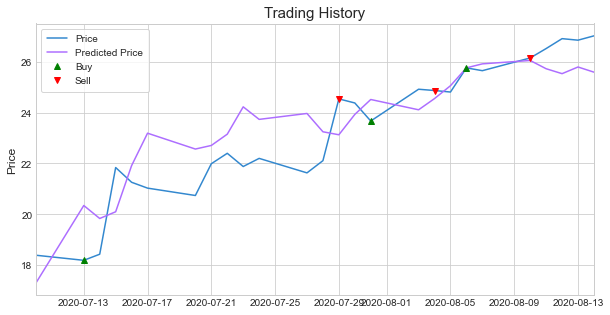

Sharpe Ratio is : 2.0724360719439305


In [35]:
boyd = yf.download('BYD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pred_dates = y_test.index
open_price = boyd.loc[pred_dates[0]:]["Open"]
y_predicted = y_pred* std_y + mean_y

stock = pd.DataFrame(open_price, index = pred_dates)
stock['Predicted_Close'] = y_predicted
stock['Close'] = y_test * std_y + mean_y
stock["Date"] = stock.index
stock.loc[stock.index[0],'Predicted_Close'] = stock.loc[stock.index[0],'Open'] - 1 


profit , net = macd_trading(stock, 5000, True, True )

#Finding sharpe Ratio 
stock['returns_pred']  = stock.Predicted_Close.pct_change()
stock['excess_daily_ret'] = stock['returns_pred'] - 0.05/252
sharpe = np.sqrt(30) * stock['excess_daily_ret'].mean() / stock['excess_daily_ret'].std()
print("Sharpe Ratio is : "+ str(sharpe) )

In [23]:
def macd_trading(stock, budget=15000, show_graph=True, show_return=True):
    
    state_check = lambda x, y: 1 if x > y else 0
    stock = stock.reset_index()    
    money = budget
    prev_state = state_check(stock.loc[0].Predicted_Close, stock.loc[0].Open)
    stock_amt = 0
    net = []

    print(prev_state)
    for i in range(1, len(stock)):

        today = stock.iloc[i]
        state = state_check(today.Predicted_Close, today.Open)
#         print(today)
#         print("--------")
#         print(state)
#         print("---------------------------------")
        if state != prev_state:

            # BUY
            if (today.Predicted_Close >= today.Open) and (money != 0):
                stock_amt = int(money / today.Open)
                money = 0
                net.append([today.Date, today.Close, 1, stock_amt * today.Close])

            # SELL
            if (today.Predicted_Close < today.Open) and (stock_amt != 0):
                money = stock_amt * today.Open
                stock_amt = 0
                net.append([today.Date, today.Close, 0, money])

#             print(net)
#             print("############################")
        prev_state = state
    
    profit = net[-1][3] - budget
    
    if show_return == True:
        print('Number of Trades: {}'.format(len(net)))
        print('Time Frame: {} days'.format((net[-1][0] - stock.loc[0].Date).days))
        print('Profit: ${:.2f} | {}%'.format(profit, round(profit/budget*100, 2)))

    if show_graph == True:
        trading_history(stock.set_index('Date'), net)

    return profit, net    
    

In [24]:
def trading_history(stock, net, std=2):    
    
    # Bollinger band plot with EMA and original historical data
    plt.figure(figsize=(10,5))
    plt.style.use('seaborn-whitegrid')
    plt.plot(stock.index, stock.Close, color='#3388cf', label='Price')
    plt.plot(stock.index, stock.Predicted_Close, color='#ad6eff' , label = "Predicted Price")
#     plt.plot(stock.index, stock.MA21, color='#ad6eff', label='Moving Average (21 days)')
#     plt.plot(stock.index, stock.Upper_band, color='#ffbd74', alpha=0.3)
#     plt.plot(stock.index, stock.Lower_band, color='#ffa33f', alpha=0.3)
#     plt.fill_between(stock.index, stock.Upper_band, stock.Lower_band, color='#ffa33f', alpha=0.1, label='Bollinger Band ({} STD)'.format(std))
    
    plt.title('Trading History', fontSize=15)
    plt.ylabel('Price', fontSize=12)
    plt.xlim([stock.index[0], stock.index[-1]])
    
    for i in net:
        if i[2] == 1: 
            color = 'green'
            marker = '^'
        else: 
            color = 'red'
            marker = "v"
        plt.plot_date(i[0], i[1], color=color, marker = marker )
        
    plt.plot_date([],[],label='Buy', c='green', marker = '^')
    plt.plot_date([],[],label='Sell', c='red', marker = "v")
        
    plt.legend(frameon=True, loc=0, ncol=1, fontsize=10, borderpad=.6)
    plt.show()

## Trading strategy taking 10day moving average

0
--------
1
---------------------------------
False [[Timestamp('2020-07-13 00:00:00'), 18.190000534057617, 1, 4984.060146331787]]
############################
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
---------------------------------
--------
1
------------------

/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


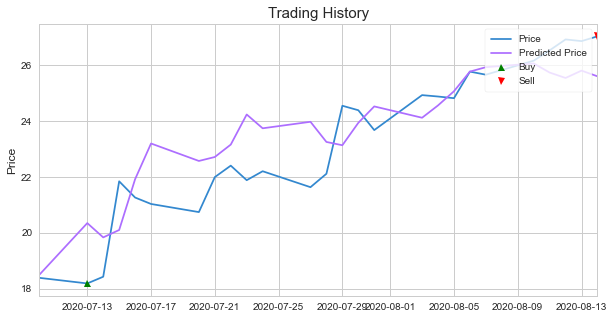

In [231]:
boyd = yf.download('BYD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)

boyd["MA"] = 0 
for i in range(10,len(boyd)):
    boyd.loc[boyd.index[i] , "MA"] = boyd.loc[boyd.index[i-10]:boyd.index[i]]["Close"].mean()
    
open_price = boyd.loc[pred_dates[0]:]["Open"]
MA = boyd.loc[pred_dates[0]:]["MA"]
pred_dates = y_test.index
y_predicted = y_pred* std_y + mean_y

stock = pd.DataFrame(open_price, index = pred_dates)
stock['Predicted_Close'] = y_predicted
stock['Close'] = y_test * std_y + mean_y
stock["Date"] = stock.index
stock["MA"] = MA

stock.loc[stock.index[0],'Predicted_Close'] = stock.loc[stock.index[0],'MA'] - 1 


profit , net = macd_trading(stock, 5000, True, True )

In [230]:
def macd_trading(stock, budget=15000, show_graph=True, show_return=True):
    
    state_check = lambda x, y: 1 if x > y else 0
    stock = stock.reset_index()    
    money = budget
    prev_state = state_check(stock.loc[0].Predicted_Close, stock.loc[0].MA)
    stock_amt = 0
    net = []

    print(prev_state)
    for i in range(1, len(stock)):

        today = stock.iloc[i]
        state = state_check(today.Predicted_Close, today.MA)
        
        print("--------")
        print(state)
        print("---------------------------------")
        if state != prev_state:

            # BUY
            if (today.Predicted_Close >= today.MA) and (money != 0):
                stock_amt = int(money / today.Close)
                money = 0
                net.append([today.Date, today.Close, 1, stock_amt * today.Close])

            # SELL
            if (today.Predicted_Close < today.MA) and (stock_amt != 0):
                money = stock_amt * today.Close
                stock_amt = 0
                net.append([today.Date, today.Close, 0, money])

            print((today.Predicted_Close < today.MA) and (stock_amt != 0), net)
            print("############################")
        prev_state = state
    
    profit = net[-1][3] - budget
    
    if show_return == True:
        print('Number of Trades: {}'.format(len(net)))
        print('Time Frame: {} days'.format((net[-1][0] - stock.loc[0].Date).days))
        print('Profit: ${:.2f} | {}%'.format(profit, round(profit/budget*100, 2)))

    if show_graph == True:
        trading_history(stock.set_index('Date'), net)

    return profit, net    
    

# Trading for the benchmark 

In [251]:
etf = yf.download('BJK', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)

In [248]:
5000/etf.loc[pred_dates[0]:]["Close"][0] * etf.loc[pred_dates[0]:]["Close"][-1]

5662.0526010369595

In [249]:
5662/5000-1

0.13240000000000007

In [260]:
etf["MA"] = 0 
for i in range(10,len(etf)):
    etf.loc[etf.index[i] , "MA"] = etf.loc[etf.index[i-10]:etf.index[i]]["Close"].mean()
    

MA = etf.loc[pred_dates[0]:]["MA"]
pred_dates = y_test.index

stock = pd.DataFrame(MA, index = pred_dates)
stock['Close'] = etf["Close"]
stock['Predicted_Close'] = etf["Close"]
stock["Date"] = stock.index

stock.loc[stock.index[0],'Close'] = stock.loc[stock.index[0],'MA'] - 1 


0
False [[Timestamp('2020-07-13 00:00:00'), 34.33000183105469, 1, 4977.85026550293]]
############################
False [[Timestamp('2020-07-13 00:00:00'), 34.33000183105469, 1, 4977.85026550293], [Timestamp('2020-07-23 00:00:00'), 34.09000015258789, 0, 4943.050022125244]]
############################
False [[Timestamp('2020-07-13 00:00:00'), 34.33000183105469, 1, 4977.85026550293], [Timestamp('2020-07-23 00:00:00'), 34.09000015258789, 0, 4943.050022125244], [Timestamp('2020-07-30 00:00:00'), 34.68000030517578, 1, 4924.560043334961]]
############################
False [[Timestamp('2020-07-13 00:00:00'), 34.33000183105469, 1, 4977.85026550293], [Timestamp('2020-07-23 00:00:00'), 34.09000015258789, 0, 4943.050022125244], [Timestamp('2020-07-30 00:00:00'), 34.68000030517578, 1, 4924.560043334961], [Timestamp('2020-07-31 00:00:00'), 33.849998474121094, 0, 4806.699783325195]]
############################
False [[Timestamp('2020-07-13 00:00:00'), 34.33000183105469, 1, 4977.85026550293], [Tim

/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
/Users/shreyavontela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


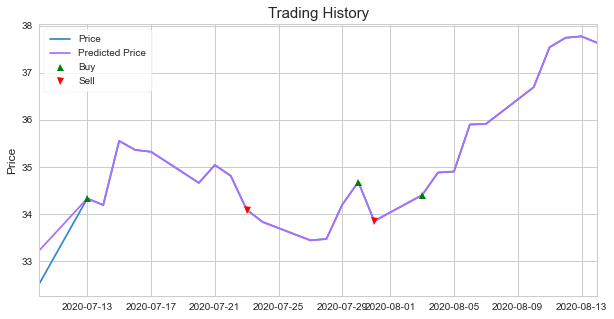

In [263]:
profit , net = macd_trading(stock, 5000, True, True )

In [262]:
def macd_trading(stock, budget=15000, show_graph=True, show_return=True):
    
    state_check = lambda x, y: 1 if x > y else 0
    stock = stock.reset_index()    
    money = budget
    prev_state = state_check(stock.loc[0].Predicted_Close, stock.loc[0].MA)
    stock_amt = 0
    net = []

    print(prev_state)
    for i in range(1, len(stock)):

        today = stock.iloc[i]
        state = state_check(today.Predicted_Close, today.MA)
        
#         print("--------")
#         print(state)
#         print("---------------------------------")
        if state != prev_state:

            # BUY
            if (today.Predicted_Close >= today.MA) and (money != 0):
                stock_amt = int(money / today.Close)
                money = 0
                net.append([today.Date, today.Close, 1, stock_amt * today.Close])

            # SELL
            if (today.Predicted_Close < today.MA) and (stock_amt != 0):
                money = stock_amt * today.Close
                stock_amt = 0
                net.append([today.Date, today.Close, 0, money])

            print((today.Predicted_Close < today.MA) and (stock_amt != 0), net)
            print("############################")
        prev_state = state
    
    profit = net[-1][3] - budget
    
    if show_return == True:
        print('Number of Trades: {}'.format(len(net)))
        print('Time Frame: {} days'.format((net[-1][0] - stock.loc[0].Date).days))
        print('Profit: ${:.2f} | {}%'.format(profit, round(profit/budget*100, 2)))

    if show_graph == True:
        trading_history(stock.set_index('Date'), net)

    return profit, net    
    